# Traffic accidents in BCN

Listado de los accidentes gestionados por la Guardia Urbana en la ciudad de Barcelona. Incorpora el número de lesionados segun gravedad, el número de vehiculos y el punto de impacto. Las coordenadas se expresan en el sistema de referencia ED50 y en el sistema geográfico (longitud y latitud).

In [375]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import folium
import pandas as pd
import geopandas
from geopandas import gpd

## Accidentes en bcn durante en 2018

In [2]:
acc_2018 = pd.read_csv('https://opendata-ajuntament.barcelona.cat/data/dataset/e769eb9d-d778-4cd7-9e3a-5858bba49b20/resource/f94d9ac3-e46e-47cd-a3d0-a9b5b9639d86/download/2018_accidents_gu_bcn.csv')
acc_2018.head(25)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,...,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2018S000150,3,Sants-Montjuïc,12,la Marina del Prat Vermell,701819,Número 3 Zona Franca / E Zona Franca ...,69-75,Dilluns,Dl,...,No és causa del vianant,0,1,0,1,2,427265.97,4576644.81,2.129612,41.336163
1,2018S000761,3,Sants-Montjuïc,11,el Poble-sec,234001,Olímpic ...,5-7,Diumenge,Dg,...,No és causa del vianant,0,0,0,0,2,429210.58,4579530.49,2.152513,41.362326
2,2018S005151,3,Sants-Montjuïc,12,la Marina del Prat Vermell,370531,A Zona Franca / Número 6 Zona Franca ...,NaN,Dimecres,Dc,...,No és causa del vianant,0,1,0,1,2,427519.99,4575229.36,2.132817,41.323437
3,2018S000933,3,Sants-Montjuïc,12,la Marina del Prat Vermell,701819,Número 3 Zona Franca / E ...,69-75,Diumenge,Dg,...,No és causa del vianant,0,2,0,2,1,427360.59,4576569.22,2.130752,41.335490
4,2018S006926,3,Sants-Montjuïc,12,la Marina del Prat Vermell,370203,Número 3 Zona Franca ...,77-111,Divendres,Dv,...,No és causa del vianant,0,0,0,0,2,426842.33,4576816.19,2.124529,41.337668
5,2018S002192,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",207803,Méndez Núñez ...,13,Dilluns,Dl,...,No és causa del vianant,0,0,0,0,1,431337.81,4582559.03,2.177601,41.389788
6,2018S007095,3,Sants-Montjuïc,12,la Marina del Prat Vermell,370531,Número 6 Zona Franca / A Zona Franca ...,NaN,Divendres,Dv,...,No és causa del vianant,0,1,0,1,2,427519.99,4575229.36,2.132817,41.323437
7,2018S008180,3,Sants-Montjuïc,12,la Marina del Prat Vermell,701305,Número 6 Zona Franca / A Zona Franca ...,NaN,Divendres,Dv,...,No és causa del vianant,0,1,0,1,2,427519.99,4575229.36,2.132817,41.323437
8,2018S009493,3,Sants-Montjuïc,12,la Marina del Prat Vermell,370531,Número 6 Zona Franca ...,80,Dijous,Dj,...,No és causa del vianant,0,1,0,1,2,426726.56,4575244.14,2.123335,41.323498
9,2018S007094,3,Sants-Montjuïc,12,la Marina del Prat Vermell,370407,Número 5 Zona Franca ...,2,Dijous,Dj,...,No és causa del vianant,0,1,1,2,2,427425.58,4575286.54,2.131682,41.323944


In [3]:
acc_2018['Numero_lesionats_lleus'].sum()

11641

## Tipo de vehiculo

In [4]:
acc_veh_18 = pd.read_csv('https://opendata-ajuntament.barcelona.cat/data/dataset/317e3743-fb79-4d2f-a128-5f12d2c9a55a/resource/6e2daeb5-e359-43ad-b0b5-7fdf438c8d6f/download/2018_accidents_vehicles_gu_bcn_.csv')
acc_veh_18.head()

,Codi_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,...,Descripcio_tipus_vehicle,Descripcio_model,Descripcio_marca,Descripcio_color,Descripcio_carnet,Antiguitat_carnet,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2018S007344,1,Ciutat Vella,1,el Raval,269108,Rambla ...,1,Diumenge,Dg,...,Turisme,CORDOBA,SEAT,Blanc,B,5,431228.30,4581110.84,2.176455,41.376735
1,2018S009617,1,Ciutat Vella,1,el Raval,701265,B-10 (Besòs) ...,K110,Dilluns,Dl,...,Turisme,206,PEUGEOT,Blau,B,1,431320.52,4580791.56,2.177594,41.373868
2,2018S008382,1,Ciutat Vella,2,el Barri Gòtic,34308,Ferran ...,2,Divendres,Dv,...,"Camió rígid > 3,5 tones",Desconegut,DAF-HERMANNS,Taronja,C,25,431052.34,4581514.69,2.174305,41.380358
3,2018S002684,1,Ciutat Vella,2,el Barri Gòtic,55909,Call ...,21,Dilluns,Dl,...,"Camió rígid > 3,5 tones",ML140E24 E,IVECO FIAT,Blanc,C,11,431241.33,4581757.56,2.176538,41.382561
4,2018S004886,1,Ciutat Vella,2,el Barri Gòtic,82901,Colom ...,25,Dimarts,Dm,...,Taxi,TOLEDO,SEAT,Negre/Groc,B,5,431390.44,4581135.49,2.178391,41.376971


In [80]:
acc_veh_clean = acc_veh_18

## Accidents by vehicule

### DATA WRANGLING AND CLEANING

In [84]:
acc_veh_clean['Descripcio_tipus_vehicle'].value_counts()

Turisme                                7707
Motocicleta                            6102
Furgoneta                              1248
Taxi                                    993
Ciclomotor                              891
Bicicleta                               782
Autobús                                 574
Camió rígid                             503
Veh. mobilitat personal amb motor       156
Tot terreny                              33
Desconegut                               27
Tren o tramvia                           17
Maquinària d'obres i serveis             14
Veh. mobilitat personal sense motor      12
Altres vehicles sense motor              10
Microbús <= 17                            6
Autocaravana                              2
Quadricicle > 75 cc                       1
Quadricicle < 75 cc                       1
Name: Descripcio_tipus_vehicle, dtype: int64

In [85]:
acc_veh_clean.Descripcio_tipus_vehicle.replace({'Quadricicle > 75 cc':'Veh. mobilitat personal amb motor', 'Quadricicle < 75 cc':'Veh. mobilitat personal amb motor',
                                                'Microbús <= 17':'Autobús','Autocaravana':'Autobús',
                                                'Altres vehicles sense motor':'Veh. mobilitat personal sense motor'}, inplace=True)
acc_veh_clean

,Codi_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,...,Descripcio_tipus_vehicle,Descripcio_model,Descripcio_marca,Descripcio_color,Descripcio_carnet,Antiguitat_carnet,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2018S007344,1,Ciutat Vella,1,el Raval,269108,Rambla ...,1,Diumenge,Dg,...,Turisme,CORDOBA,SEAT,Blanc,B,5,431228.30,4581110.84,2.176455,41.376735
1,2018S009617,1,Ciutat Vella,1,el Raval,701265,B-10 (Besòs) ...,K110,Dilluns,Dl,...,Turisme,206,PEUGEOT,Blau,B,1,431320.52,4580791.56,2.177594,41.373868
2,2018S008382,1,Ciutat Vella,2,el Barri Gòtic,34308,Ferran ...,2,Divendres,Dv,...,Camió rígid,Desconegut,DAF-HERMANNS,Taronja,C,25,431052.34,4581514.69,2.174305,41.380358
3,2018S002684,1,Ciutat Vella,2,el Barri Gòtic,55909,Call ...,21,Dilluns,Dl,...,Camió rígid,ML140E24 E,IVECO FIAT,Blanc,C,11,431241.33,4581757.56,2.176538,41.382561
4,2018S004886,1,Ciutat Vella,2,el Barri Gòtic,82901,Colom ...,25,Dimarts,Dm,...,Taxi,TOLEDO,SEAT,Negre/Groc,B,5,431390.44,4581135.49,2.178391,41.376971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19074,2018S006251,10,Sant Martí,73,la Verneda i la Pau,150852,Fernando de los Ríos ...,NaN,Dilluns,Dl,...,Turisme,VECTRA,OPEL,Platejat,Desconegut,Desconegut,433930.24,4586310.21,2.208196,41.423791
19075,2018S006492,10,Sant Martí,73,la Verneda i la Pau,153205,Guipúscoa ...,132,Diumenge,Dg,...,Turisme,307,PEUGEOT,Gris,B,1,433522.49,4585979.28,2.203353,41.420777
19076,2018S006492,10,Sant Martí,73,la Verneda i la Pau,153205,Guipúscoa ...,NaN,Diumenge,Dg,...,Turisme,C4,CITROEN,Negre,B,24,433522.49,4585979.28,2.203353,41.420777
19077,2018S006492,10,Sant Martí,73,la Verneda i la Pau,153205,Guipúscoa ...,NaN,Diumenge,Dg,...,Turisme,MINI COOPER,MINI,Desconegut,Desconegut,Desconegut,433522.49,4585979.28,2.203353,41.420777


In [205]:
#employees.pivot_table(index=['Title'], columns=['Years'], values=['Salary'], fill_value= 0)
acc_veh_day =acc_veh_clean.pivot_table(index=['Descripcio_dia_setmana'], columns=['Descripcio_tipus_vehicle'], values=['Codi_expedient'], aggfunc='count')
acc_veh_day

Codi_expedient                                   \
Descripcio_tipus_vehicle        Autobús Bicicleta Camió rígid Ciclomotor   
Descripcio_dia_setmana                                                     
Dijous                             81.0     140.0        76.0      132.0   
Dilluns                           101.0     116.0        84.0      128.0   
Dimarts                            93.0     143.0        92.0      156.0   
Dimecres                          113.0     117.0        92.0      133.0   
Dissabte                           64.0      64.0        33.0      102.0   
Diumenge                           42.0      58.0        24.0       81.0   
Divendres                          88.0     144.0       102.0      159.0   

                                                                            \
Descripcio_tipus_vehicle Desconegut Furgoneta Maquinària d'obres i serveis   
Descripcio_dia_setmana                                                       
Dijous                          6.0     224.0                          NaN   
Dilluns                         4.0     214.0                          2.0   
Dimarts                         5.0     201.0                          2.0   
Dimecres                        2.0     208.0                          3.0   
Dissabte                        3.0     111.0                          4.0   
Diumenge                        4.0      66.0                          2.0   
Divendres                       3.0     224.0                          1.0   

                                                                        \
Descripcio_tipus_vehicle Motocicleta   Taxi Tot terreny Tren o tramvia   
Descripcio_dia_setmana                                                   
Dijous                        1027.0  130.0         5.0            2.0   
Dilluns                        957.0  170.0         6.0            2.0   
Dimarts                        998.0  151.0         4.0            1.0   
Dimecres                      1016.0  136.0         2.0            4.0   
Dissabte                       582.0  137.0         3.0            4.0   
Diumenge                       409.0   94.0         3.0            2.0   
Divendres                     1113.0  175.0        10.0            2.0   

                                                                    \
Descripcio_tipus_vehicle Turisme Veh. mobilitat personal amb motor   
Descripcio_dia_setmana                                               
Dijous                    1169.0                              26.0   
Dilluns                   1089.0                              27.0   
Dimarts                   1134.0                              30.0   
Dimecres                  1181.0                              27.0   
Dissabte                   972.0                              10.0   
Diumenge                   871.0                              10.0   
Divendres                 1291.0                              28.0   

                                                              
Descripcio_tipus_vehicle Veh. mobilitat personal sense motor  
Descripcio_dia_setmana                                        
Dijous                                                   2.0  
Dilluns                                                  6.0  
Dimarts                                                  3.0  
Dimecres                                                 3.0  
Dissabte                                                 4.0  
Diumenge                                                 4.0  
Divendres                                                NaN

In [206]:
acc_veh_day.columns = acc_veh_day.columns.droplevel(0)
acc_veh_day

Descripcio_tipus_vehicle,Autobús,Bicicleta,Camió rígid,Ciclomotor,Desconegut,Furgoneta,Maquinària d'obres i serveis,Motocicleta,Taxi,Tot terreny,Tren o tramvia,Turisme,Veh. mobilitat personal amb motor,Veh. mobilitat personal sense motor
Descripcio_dia_setmana,,,,,,,,,,,,,,
Dijous,81.0,140.0,76.0,132.0,6.0,224.0,NaN,1027.0,130.0,5.0,2.0,1169.0,26.0,2.0
Dilluns,101.0,116.0,84.0,128.0,4.0,214.0,2.0,957.0,170.0,6.0,2.0,1089.0,27.0,6.0
Dimarts,93.0,143.0,92.0,156.0,5.0,201.0,2.0,998.0,151.0,4.0,1.0,1134.0,30.0,3.0
Dimecres,113.0,117.0,92.0,133.0,2.0,208.0,3.0,1016.0,136.0,2.0,4.0,1181.0,27.0,3.0
Dissabte,64.0,64.0,33.0,102.0,3.0,111.0,4.0,582.0,137.0,3.0,4.0,972.0,10.0,4.0
Diumenge,42.0,58.0,24.0,81.0,4.0,66.0,2.0,409.0,94.0,3.0,2.0,871.0,10.0,4.0
Divendres,88.0,144.0,102.0,159.0,3.0,224.0,1.0,1113.0,175.0,10.0,2.0,1291.0,28.0,NaN


In [209]:
acc_veh_day.reset_index(inplace=True)
acc_veh_day

Descripcio_tipus_vehicle,Descripcio_dia_setmana,Autobús,Bicicleta,Camió rígid,Ciclomotor,Desconegut,Furgoneta,Maquinària d'obres i serveis,Motocicleta,Taxi,Tot terreny,Tren o tramvia,Turisme,Veh. mobilitat personal amb motor,Veh. mobilitat personal sense motor
0,Dijous,81.0,140.0,76.0,132.0,6.0,224.0,NaN,1027.0,130.0,5.0,2.0,1169.0,26.0,2.0
1,Dilluns,101.0,116.0,84.0,128.0,4.0,214.0,2.0,957.0,170.0,6.0,2.0,1089.0,27.0,6.0
2,Dimarts,93.0,143.0,92.0,156.0,5.0,201.0,2.0,998.0,151.0,4.0,1.0,1134.0,30.0,3.0
3,Dimecres,113.0,117.0,92.0,133.0,2.0,208.0,3.0,1016.0,136.0,2.0,4.0,1181.0,27.0,3.0
4,Dissabte,64.0,64.0,33.0,102.0,3.0,111.0,4.0,582.0,137.0,3.0,4.0,972.0,10.0,4.0
5,Diumenge,42.0,58.0,24.0,81.0,4.0,66.0,2.0,409.0,94.0,3.0,2.0,871.0,10.0,4.0
6,Divendres,88.0,144.0,102.0,159.0,3.0,224.0,1.0,1113.0,175.0,10.0,2.0,1291.0,28.0,NaN


In [139]:
acc_veh_day.to_csv('acc_day_veh.csv', index=False)

In [ ]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(a.index))

for row in range(0, len(acc_veh_day.index)):
make_spider( row=row, title=acc_veh_day[row], color=my_palette(row))

###  VISUALIZATION ACCIDENTS BY DAY OF THE WEEK Radar Chart WITH SEABORN

In [224]:
%matplotlib inline

array(['Dijous', 'Dilluns', 'Dimarts', 'Dimecres', 'Dissabte', 'Diumenge',
       'Divendres'], dtype=object)

In [262]:
labels = np.array(acc_veh_day.iloc[:,0])
angles = np.linspace(0, 2*np.pi, len(acc_veh_day.iloc[:,1]), endpoint=False)
day_val = acc_veh_day.iloc[:,1].values
title   = acc_veh_day.columns[1:]


Index(['Autobús', 'Bicicleta', 'Camió rígid', 'Ciclomotor', 'Desconegut',
       'Furgoneta', 'Maquinària d'obres i serveis', 'Motocicleta', 'Taxi',
       'Tot terreny', 'Tren o tramvia', 'Turisme',
       'Veh. mobilitat personal amb motor',
       'Veh. mobilitat personal sense motor'],
      dtype='object', name='Descripcio_tipus_vehicle')

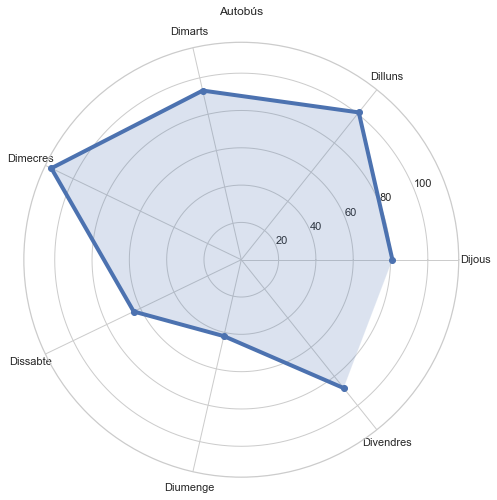

In [263]:

fig=plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, polar=True)   # Set polar axis
ax.plot(angles, day_val, 'o-', linewidth=4)  # Draw the plot (or the frame on the radar chart)
ax.fill(angles, day_val, alpha=0.2)  #Fulfill the area
ax.set_thetagrids(angles * 180/np.pi, labels)  # Set the label for each axis
ax.set_title(title[0])  
ax.grid(True)

In [ ]:
plt.colorp

In [361]:
def make_spider(angle, val, label, tit):
    fig=plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111, polar=True)   # Set polar axis
    ax.plot(angle,  val, 'o-', linewidth=4)  # Draw the plot (or the frame on the radar chart) agregar color
    ax.fill(angle, val, alpha=0.2)  #Fulfill the area
    ax.set_thetagrids(angles* 180/np.pi, labels)  # Set the label for each axis
    ax.set_title(tit)
    ax.grid(True)
    #ax.savefig('radar'+str(tit)+'.png')
    
    #sns.palplot(sns.color_palette("cubehelix", 8))

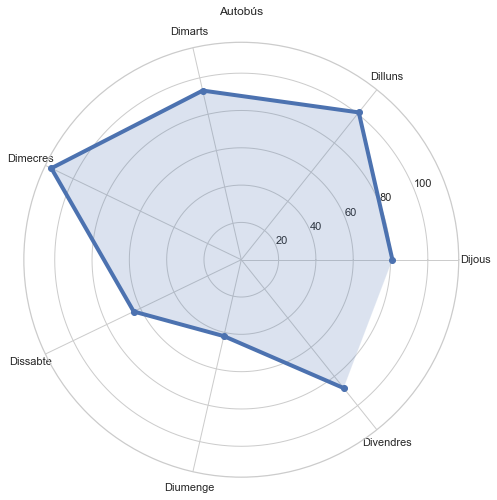

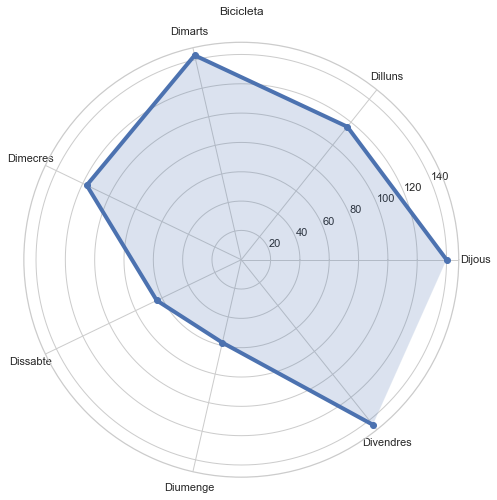

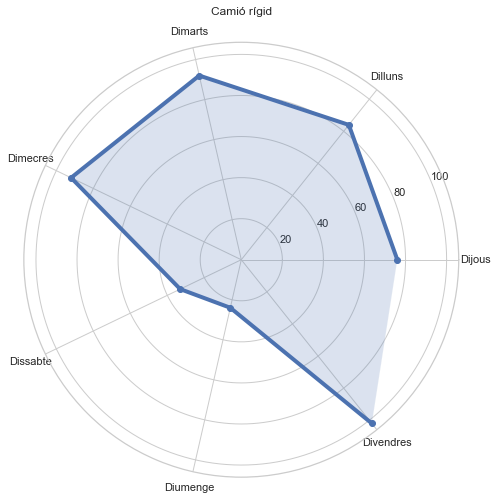

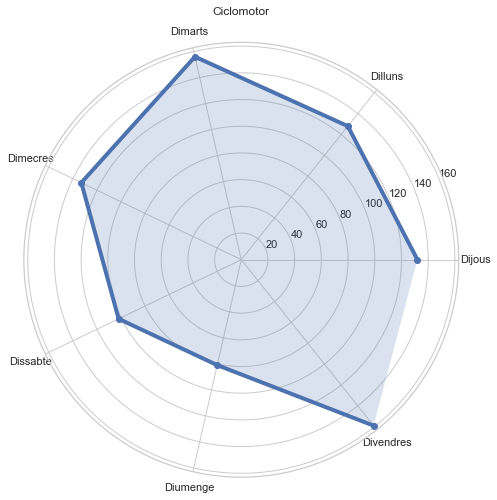

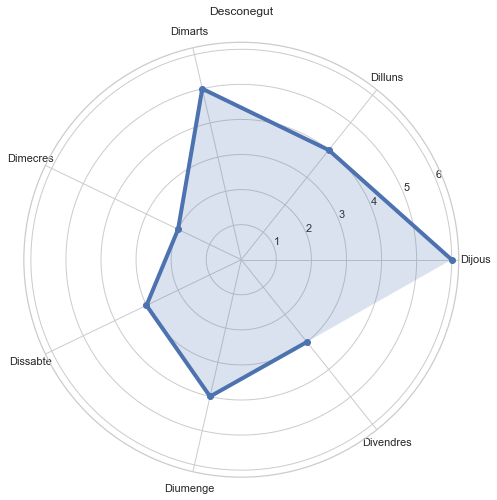

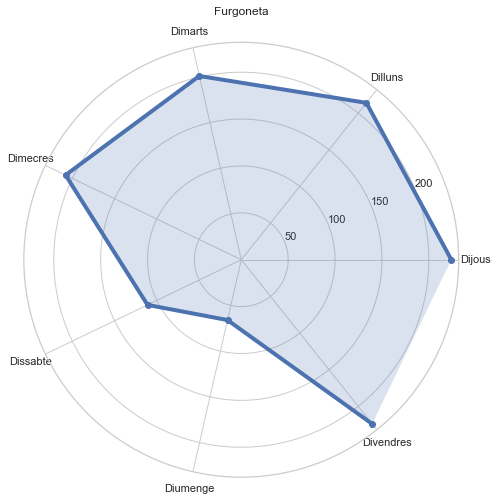

c:\program files\python38\lib\site-packages\matplotlib\projections\polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


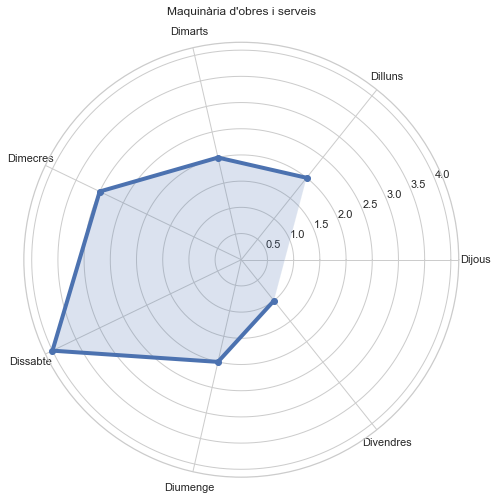

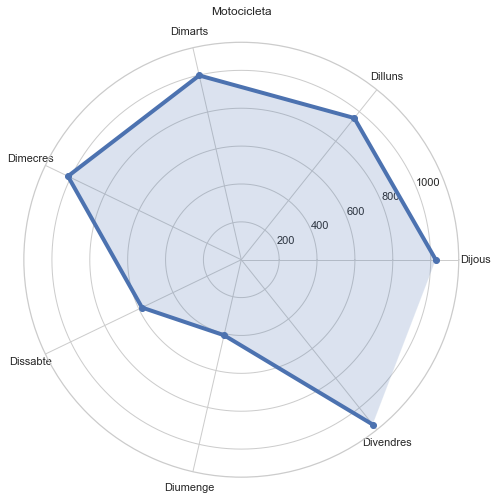

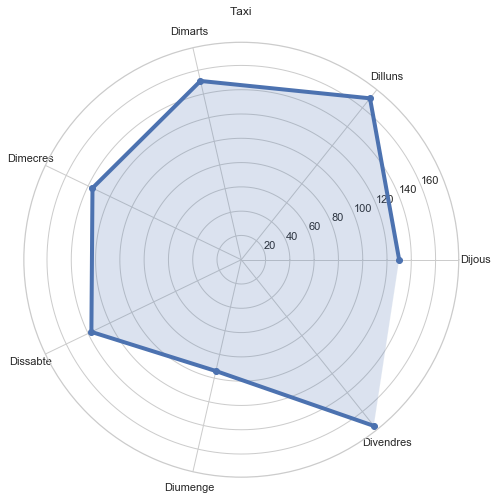

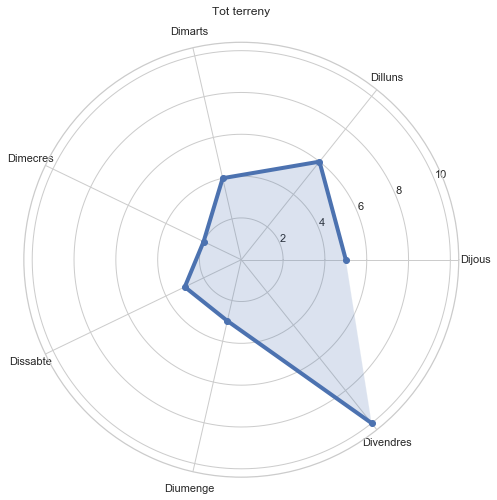

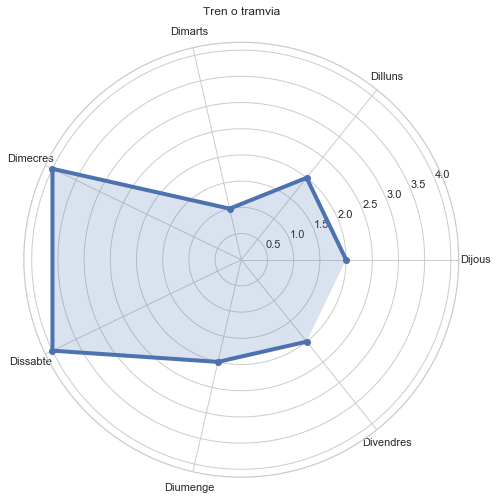

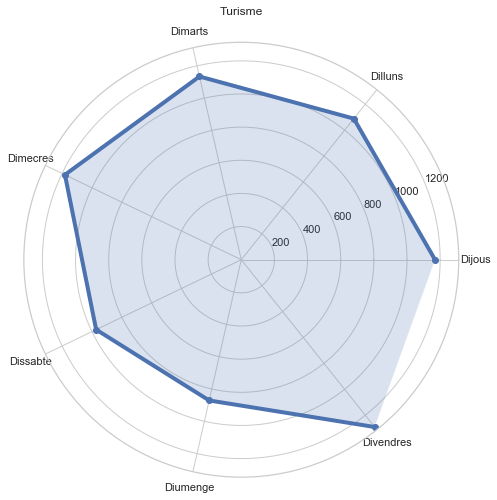

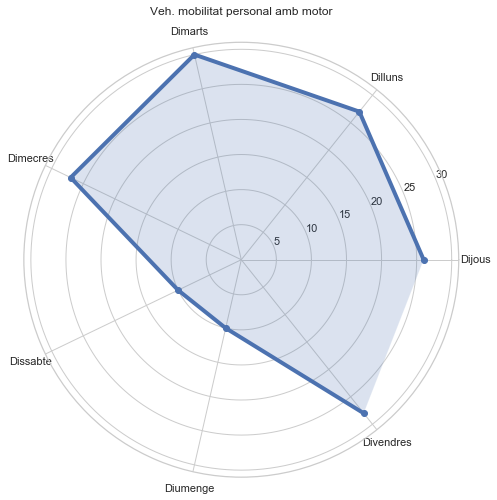

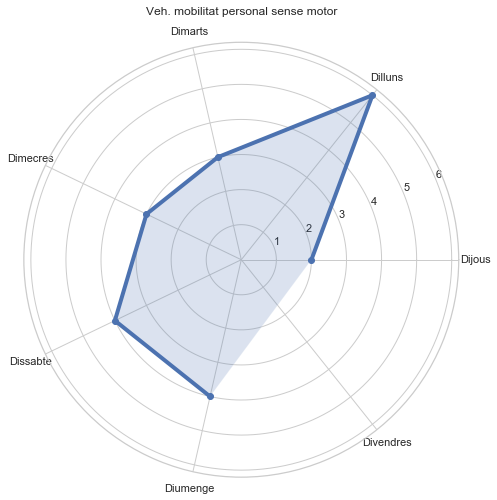

In [364]:
"""for row in range(0, len(acc_veh_day.index)):
make_spider( row=row, title=acc_veh_day[row], color=my_palette(row))
import random
color  = ['b','g','r','c','m','y','k']"""   
title   = acc_veh_day.columns

for row in range(1, len(title)):
    labels  = np.array(acc_veh_day.iloc[:,0])
    angles  = np.linspace(0, 2*np.pi, len(acc_veh_day.iloc[:,row]), endpoint=False)
    day_val = acc_veh_day.iloc[:,row].values
    title1   = acc_veh_day.columns[row]
    #colorea   = random.choice(color)
    
    make_spider(angles, day_val, labels, title1)
    
    
    

## ACCIDENTS BY VEHICULE

In [93]:
acc_by_veh_type = acc_veh_clean.groupby('Descripcio_tipus_vehicle', as_index=False)[['Codi_expedient']].count().sort_values(by='Codi_expedient',ascending=False)
acc_by_veh_type.head(9)

,Descripcio_tipus_vehicle,Codi_expedient
11,Turisme,7707
7,Motocicleta,6102
5,Furgoneta,1248
8,Taxi,993
3,Ciclomotor,891
1,Bicicleta,782
0,Autobús,582
2,Camió rígid,503
12,Veh. mobilitat personal amb motor,158


In [96]:
import seaborn as sns
sns.set(style="whitegrid") 

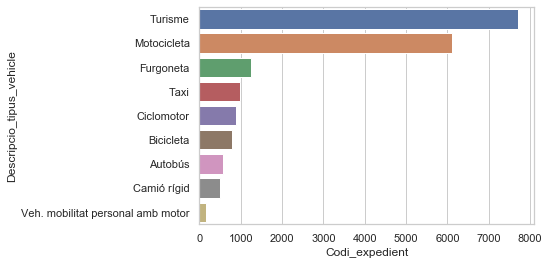

In [99]:
ax = sns.barplot(x="Codi_expedient", y="Descripcio_tipus_vehicle", data=acc_by_veh_type.head(9))

In [7]:
acc_veh_gb = acc_veh_18[['Codi_expedient','Descripcio_tipus_vehicle',
       'Descripcio_model', 'Descripcio_marca','Descripcio_carnet', 'Antiguitat_carnet']]

## Round Lat & Lon

In [8]:
#df.round({"A":1, "B":2, "C":3, "D":4}) 
acc_18 = acc_2018.round({'Latitud':4,'Longitud':4})
acc_18.shape

(9936, 27)

In [9]:
acc_2018.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia', 'Any',
       'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn',
       'Descripcio_causa_vianant', 'Numero_morts', 'Numero_lesionats_lleus',
       'Numero_lesionats_greus', 'Numero_victimes',
       'Numero_vehicles_implicats', 'Coordenada_UTM_X', 'Coordenada_UTM_Y',
       'Longitud', 'Latitud'],
      dtype='object')

# MAPA BASE

In [10]:
a = folium.Map(location=[41.3902, 2.1540], 
               zoom_start=12,
               tiles='CartoDB dark_matter')

marker = folium.CircleMarker(location=[41.3902, 2.1540]).add_to(a)

In [11]:
a.save('map.html')

In [346]:

b = folium.Map(location=[41.3902, 2.1540], 
               zoom_start=12,
               tiles='Stamen Terrain')

for index, row in acc_18.sample(1500).iterrows():
    radi = (row['Numero_morts']*4 + row['Numero_victimes']/2)
    #popup_text = "{}<br> total death: {}<br> total injured: {}"
    #popup_text = popup_text.format(row["Numero_morts"], row["Numero_victimes"], acc_18)
    if row['Numero_morts'] > 0:
        color="#E37222"
    else:
        color="#0A8A9F"
    folium.CircleMarker(location=[row['Latitud'],row['Longitud']],
                         radius=radi,
                         color=color,
                         #popup = popup_text,
                         fill=True).add_to(b)
        
        
    """folium.CircleMarker(location=(row, acc_gu_18.Latitud],
                                 [row, acc_gu_18.Longitud]),
                                 
                                 
                                 
                                 popup_text = "{}<br> total departures: {}<br> total arrivals: {}<br> net departures: {}"
        popup_text = popup_text.format(row["Start Station Name"],
                          row["Arrival Count"],
                          row["Departure Count"],
                          net_departures)"""
    
    

In [347]:
b

## Fatal Accidents

In [14]:
acc_graves_18 = acc_18.loc[(acc_18['Numero_morts'] != 0) | (acc_18['Numero_lesionats_greus'] != 0)]
acc_graves_18.shape

(242, 27)

In [348]:
c = folium.Map(location=[41.3902, 2.1540], 
               zoom_start=12,
               tiles='Stamen Terrain')

for index, row in acc_graves_18.iterrows():
    radi = (row['Numero_morts']*6 + row['Numero_victimes']*3)
    acc_gra =(row['Numero_morts'],row['Numero_victimes'])
    popup_text = "<br>adress: {}<br> total death: {}<br> total injured: {}"
    popup_text = popup_text.format(row["Nom_carrer"], row["Numero_morts"], row["Numero_victimes"], acc_gra)
    if row['Numero_morts'] > 0:
        color="#E37222"
    else:
        color="#0A8A9F"
    folium.CircleMarker(location=[row['Latitud'],row['Longitud']],
                         radius=radi,
                         color=color,
                         popup = popup_text,
                         fill=True).add_to(c)
        

In [349]:
c

## Accidents by neighbourhood

In [17]:
import os

In [327]:
bcn_neigh = geopandas.read_file("http://data.insideairbnb.com/spain/catalonia/barcelona/2019-11-09/visualisations/neighbourhoods.geojson")
bcn_neigh.neighbourhood_group.unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Sant Martí',
       'Les Corts', 'Horta-Guinardó', 'Sarrià-Sant Gervasi', 'Gràcia',
       'Nou Barris', 'Sant Andreu'], dtype=object)

In [331]:
bcn_districts = geopandas.read_file('bcn-geodata/districtes/shapefiles_barcelona_distrito.geojson')

In [325]:
#bcn_districts.rename(columns={'n_distri':'Nom_districte'}, inplace=True)

In [352]:
bcn_districts.columns

Index(['cartodb_id', 'c_distri', 'n_distri', 'homes', 'dones', 'area', 'perim',
       'coord_x', 'coord_y', 'web_1', 'web_2', 'web_3', 'geometry'],
      dtype='object')

In [353]:
distr_bcn = bcn_districts[['cartodb_id', 'c_distri', 'n_distri', 'area', 'perim','coord_x', 'coord_y', 'geometry']]

In [354]:
distr_bcn

,cartodb_id,c_distri,n_distri,area,perim,coord_x,coord_y,geometry
0,5,05,Sarrià -Sant Gervasi,2.009280e+07,37563.642237,425388.507986,4.585170e+06,"MULTIPOLYGON (((2.07212 41.41270, 2.07050 41.4..."
1,7,07,Horta-Guinardo,1.194708e+07,20413.187364,429117.618770,4.586950e+06,"MULTIPOLYGON (((2.17616 41.42544, 2.17654 41.4..."
2,1,01,Ciutat Vella,4.368465e+06,21035.207261,431616.773990,4.581564e+06,"MULTIPOLYGON (((2.18239 41.39143, 2.18346 41.3..."
3,2,02,Eixample,7.476392e+06,13902.573980,430243.353657,4.582773e+06,"MULTIPOLYGON (((2.18239 41.39143, 2.18134 41.3..."
4,3,03,Sants-Montjuic,2.294042e+07,47125.925905,428562.773279,4.578163e+06,"MULTIPOLYGON (((2.16785 41.37498, 2.16856 41.3..."
5,4,04,Les Corts,6.017532e+06,12481.472647,426369.646389,4.582295e+06,"MULTIPOLYGON (((2.10291 41.40109, 2.10295 41.4..."
6,6,06,Gracia,4.185517e+06,12280.060880,429253.013001,4.584840e+06,"MULTIPOLYGON (((2.16865 41.40696, 2.16979 41.4..."
7,8,08,Nou Barris,8.041439e+06,14698.411907,431185.040621,4.588829e+06,"MULTIPOLYGON (((2.18745 41.46213, 2.18744 41.4..."
8,9,09,Sant Andreu,6.565322e+06,15132.450209,432697.846739,4.587572e+06,"MULTIPOLYGON (((2.20719 41.42756, 2.20558 41.4..."
9,10,10,Sant Martí­,1.052376e+07,20736.527911,433330.835564,4.584520e+06,"MULTIPOLYGON (((2.20719 41.42756, 2.20715 41.4..."


In [388]:
distr_bcn.rename(columns={'c_distri':'Codi_districte'}, inplace=True)
distr_bcn

,cartodb_id,Codi_districte,n_distri,area,perim,coord_x,coord_y,geometry
0,5,05,Sarrià -Sant Gervasi,2.009280e+07,37563.642237,425388.507986,4.585170e+06,"MULTIPOLYGON (((2.07212 41.41270, 2.07050 41.4..."
1,7,07,Horta-Guinardo,1.194708e+07,20413.187364,429117.618770,4.586950e+06,"MULTIPOLYGON (((2.17616 41.42544, 2.17654 41.4..."
2,1,01,Ciutat Vella,4.368465e+06,21035.207261,431616.773990,4.581564e+06,"MULTIPOLYGON (((2.18239 41.39143, 2.18346 41.3..."
3,2,02,Eixample,7.476392e+06,13902.573980,430243.353657,4.582773e+06,"MULTIPOLYGON (((2.18239 41.39143, 2.18134 41.3..."
4,3,03,Sants-Montjuic,2.294042e+07,47125.925905,428562.773279,4.578163e+06,"MULTIPOLYGON (((2.16785 41.37498, 2.16856 41.3..."
5,4,04,Les Corts,6.017532e+06,12481.472647,426369.646389,4.582295e+06,"MULTIPOLYGON (((2.10291 41.40109, 2.10295 41.4..."
6,6,06,Gracia,4.185517e+06,12280.060880,429253.013001,4.584840e+06,"MULTIPOLYGON (((2.16865 41.40696, 2.16979 41.4..."
7,8,08,Nou Barris,8.041439e+06,14698.411907,431185.040621,4.588829e+06,"MULTIPOLYGON (((2.18745 41.46213, 2.18744 41.4..."
8,9,09,Sant Andreu,6.565322e+06,15132.450209,432697.846739,4.587572e+06,"MULTIPOLYGON (((2.20719 41.42756, 2.20558 41.4..."
9,10,10,Sant Martí­,1.052376e+07,20736.527911,433330.835564,4.584520e+06,"MULTIPOLYGON (((2.20719 41.42756, 2.20715 41.4..."


In [386]:
acc_dist= acc_18.groupby(['Codi_districte','Nom_districte'],as_index=False).sum()


In [385]:
acc_dist = acc_dist[['Codi_districte','Nom_districte','Numero_morts', 'Numero_lesionats_lleus',
                     'Numero_lesionats_greus', 'Numero_victimes','Numero_vehicles_implicats']]
acc_dist

,Codi_districte,Nom_districte,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats
0,1,Ciutat Vella,1,604,17,622,966
1,2,Eixample,4,3506,73,3583,5770
2,3,Sants-Montjuïc,3,1208,25,1236,2001
3,4,Les Corts,0,840,15,855,1325
4,5,Sarrià-Sant Gervasi,3,1307,21,1331,2142
5,6,Gràcia,0,554,4,558,876
6,7,Horta-Guinardó,2,841,18,861,1377
7,8,Nou Barris,3,625,11,639,1041
8,9,Sant Andreu,2,753,15,770,1263
9,10,Sant Martí,3,1403,37,1443,2332


In [50]:
import geojson

In [24]:
import folium

In [ ]:
m = folium.Map(location=[41.3902, 2.1540], 
               zoom_start=10,
               tiles='Stamen Terrain')
               
m.choropleth(
    geo_data=geojs,
    name='choropleth',
    data=acc_dist,
    columns=['Codi_districte','Numero_victimes'],
    key_on="properties.NOM",
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='accidents by neigbourhood'
)
folium.LayerControl().add_to(m)
               
m.save('map3.html')

In [350]:
m = folium.Map(location=[41.3902, 2.1540], 
               zoom_start=10,
               tiles='Stamen Terrain')
               
m.choropleth(
    geo_data=geojs,
    name='choropleth',
    data=acc_dist,
    columns=['Nom_districte','Numero_victimes'],
    key_on="properties.NOM",
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='accidents by neigbourhood'
)
folium.LayerControl().add_to(m)
               
m.save('map3.html')

c:\program files\python38\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [351]:
m

## Carriles Bici

In [ ]:
car_bici_constr = gpd.read_file('https://opendata-ajuntament.barcelona.cat/data/dataset/edee68e3-5ff1-43d0-b556-12c5d8eb019e/resource/2a78a628-7996-417c-918f-9ccfa91da4cf/download')
car_bici        = gpd.read_file('https://opendata-ajuntament.barcelona.cat/data/dataset/e3497ea4-0bae-4093-94a7-119df50a8a74/resource/4608cf0c-2f11-4a25-891f-c5afc3af82c5/download')